# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:





---

---
K-means clustering merupakan salah satu algoritma analisis klaster (cluster analysis) non hirarki dan berfungsi untuk  mengelompokkan  data berdasarkan variabel atau feature.


---
Algoritma K-means clustering mengelompokkan data berdasarkan jarak antara data terhadap titik centroid klaster yang didapatkan melalui proses berulang. Analisis perlu menentukan jumlah K sebagai input algoritma.












---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv("/content/gdrive/My Drive/Datasets/pelanggan_supermarket.csv")

In [ ]:
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [ ]:
#code here
# Handling missing value 
df = df.drop(["Jenis Kelamin","Pendapatan pertahun (juta)"], axis =1)

In [ ]:
print(df)
df.isnull().sum()
updated_df = df
updated_df['Umur']=updated_df['Umur'].fillna(updated_df['Umur'].mean())
updated_df['Skor Belanja (1-100)']=updated_df['Skor Belanja (1-100)'].fillna(updated_df['Skor Belanja (1-100)'].mean())
updated_df.info()

     ID_pelanggan   Umur  Skor Belanja (1-100)
0               1   19.0                  39.0
1               2   21.0                  81.0
2               3   20.0                   6.0
3               4   23.0                  77.0
4               5   31.0                  40.0
..            ...    ...                   ...
245           246   59.0                  14.0
246           247   35.0                  90.0
247           248   37.0                  32.0
248           249   32.0                  86.0
249           250  120.0                  15.0

[250 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_pelanggan          250 non-null    int64  
 1   Umur                  250 non-null    float64
 2   Skor Belanja (1-100)  250 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 6.0 KB


In [15]:
updated_df_sorted = updated_df.sort_values(['Umur','Skor Belanja (1-100)'])
updated_df_sorted

,ID_pelanggan,Umur,Skor Belanja (1-100)
91,92,18.0,41.0
114,115,18.0,48.0
65,66,18.0,59.0
33,34,18.0,92.0
162,163,19.0,5.0
...,...,...,...
90,91,68.0,55.0
57,58,69.0,46.0
70,71,70.0,55.0
60,61,70.0,56.0


In [20]:
def cap_data(df3):
    for col in df3.columns:
        print("capping the ",col)
        if (((df3[col].dtype)=='float64') | ((df3[col].dtype)=='int64')):
            percentiles = df3[col].quantile([0.25,0.75]).values
            df3[col][df3[col] <= percentiles[0]] = percentiles[0]
            df3[col][df3[col] >= percentiles[1]] = percentiles[1]
        else:
            df3[col]=df3[col]
    return df3

final_df=cap_data(updated_df_sorted)
final_df

capping the  ID_pelanggan
capping the  Umur
capping the  Skor Belanja (1-100)


,ID_pelanggan,Umur,Skor Belanja (1-100)
91,92.0000,29.0,41.0
114,115.0000,29.0,48.0
65,66.0000,29.0,59.0
33,63.4375,29.0,74.0
162,163.0000,29.0,27.0
...,...,...,...
90,91.0000,48.0,55.0
57,63.4375,48.0,46.0
70,71.0000,48.0,55.0
60,63.4375,48.0,56.0


In [44]:
scaler = StandardScaler()
b = scaler.fit_transform(final_df.values.reshape(-1,2))

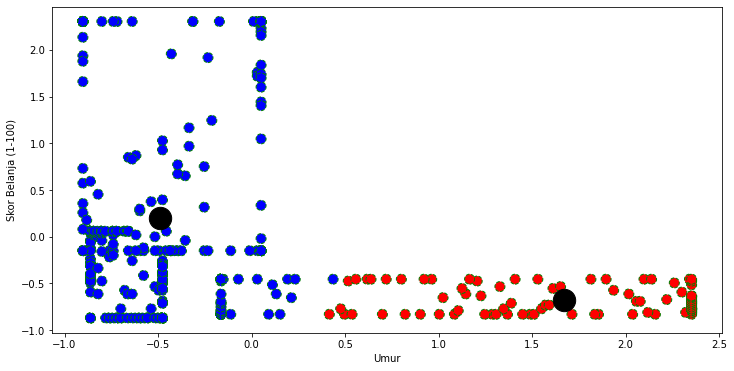

In [42]:
## Clustering with KMeans
kmeans = KMeans(n_clusters=2, random_state=42).fit(b)
labels = kmeans.labels_
new_dfa =pd.DataFrame(data = b, columns =['Umur','Skor Belanja (1-100)'])
new_dfa['label_kmeans'] = labels
fig,ax = plt. subplots(figsize=(12,6))
plt.scatter(new_dfa["Umur"][new_dfa["label_kmeans"]==0], new_dfa["Skor Belanja (1-100)"][new_dfa["label_kmeans"]==0], 
            color = "red", s= 100, edgecolor="green",linestyle ="--")
plt.scatter(new_dfa["Umur"][new_dfa["label_kmeans"]==1], new_dfa["Skor Belanja (1-100)"][new_dfa["label_kmeans"]==1],
            color = "blue", s= 100, edgecolor="green",linestyle ="--")
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="black", s=500)
ax.set_xlabel("Umur")
ax.set_ylabel("Skor Belanja (1-100)")
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini:
Hasil Clustering yang Saya lakukan belum selesai, tetapi jika melihat dari expected output, jika segmentasi dibagi 2, semakin besar umur, skor belanja tidak besar, dan sebaliknya. Sedangkan untuk segmentasi terbagi 3, terdapat umur yang kecil dengan skor yang kecil, umur kecil skor belanja besar, umur besar dan skor kecil